# PHYS 210: Project 1

Jack Hong, 30935134 <br>
October 25, 2016

Projectile Motion Solver. Assumes horizontal terrain.

In [3]:
%matplotlib notebook

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.misc import derivative as deriv

In [5]:
m = 1       # mass of the projectile in kg
c = 0.1     # coefficient of drag in kg/s
g = 9.8     # gravity of Earth in m/s^2
vT = m*g/c  # terminal velocity in m/s

In [6]:
plotfig = True                               # if True, plot D, H, t_total, and v_impact
                                             # for v0 and theta defined below
    
theta = np.linspace(1e-3, np.pi/2-1e-3, 100) # angles to plot in radians    
v0 = np.array([1,10,80])                     # initial speeds to plot in m/s

In [7]:
def x(t, theta, v0):
    """ Return the x position of a projectile.
    
    t -- time in seconds
    theta -- launch angle in radians
    v0 -- total initial velocity in m/s
    """
    return v0*vT/g * np.cos(theta) * (1-np.exp(-g*t/vT))

def x_prime(t, theta, v0):
    """Return the derivative of x at t
    
    t -- time in seconds
    theta -- launch angle in radians
    v0 -- total initial velocity in m/s
    """
    return deriv(x, t, args=(theta, v0), dx=1e-5)
def y(t, theta, v0):
    """ Return the y position of a projectile.
    
    t -- time in seconds
    theta -- launch angle in radians
    v0 -- total initial velocity in m/s
    """
    return vT/g * (v0*np.sin(theta) + vT) * (1-np.exp(-g*t/vT)) - vT*t

def y_prime(t, theta, v0):
    """Return the derivative of y at t
    
    t -- time in seconds
    theta -- launch angle in radians
    v0 -- total initial velocity in m/s
    """
    return deriv(y, t, args=(theta, v0), dx=1e-5)

x(0)

In [8]:
def D(theta, v0):
    """Return horizontal distance to impact in meters.
    
    theta -- launch angle in radians
    v0 -- initial total velocity
    """
    return x(t_total(theta, v0), theta, v0)
    
def H(theta, v0):
    """Return max height of projectile in meters.
    
    theta -- launch angle in radians
    v0 -- initial total velocity
    """
    return spopt.brentq(y_prime, 1e-8, 1e3, args=(theta, v0))
    
def t_total(theta, v0):
    """Return time of flight of projectile in seconds
    
    theta -- launch angle in radians
    v0 -- initial total velocity
    """
    return spopt.brentq(y, 1e-8, 1e3, args=(theta, v0))
    
def v_impact(theta, v0):
    """Return the total velocity at the impact point in m/s
    
    theta -- launch angle in radians
    v0 -- initial total velocity
    """
    t_impact = t_total(theta, v0)
    y_vel = y_prime(t_impact, theta, v0)
    x_vel = x_prime(t_impact, theta, v0)
    return np.sqrt(x_vel**2 + y_vel**2)

<IPython.core.display.Javascript object>


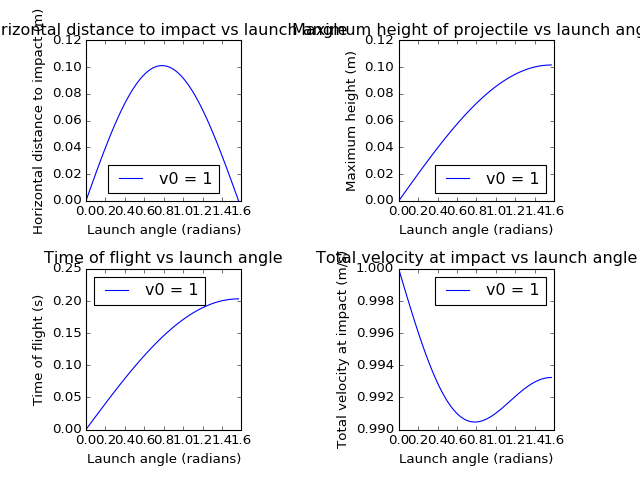

<IPython.core.display.Javascript object>


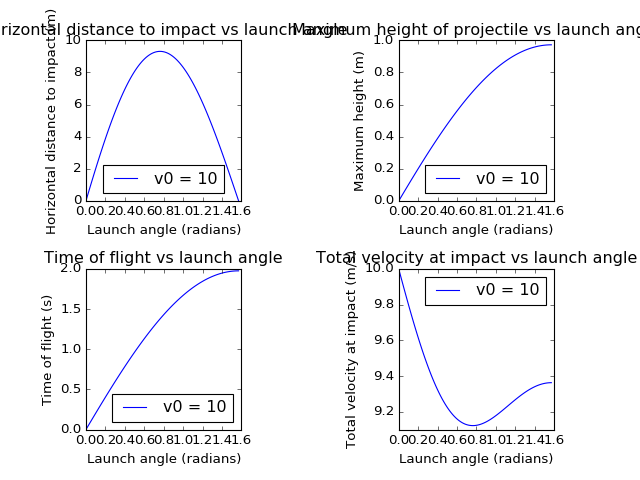

<IPython.core.display.Javascript object>


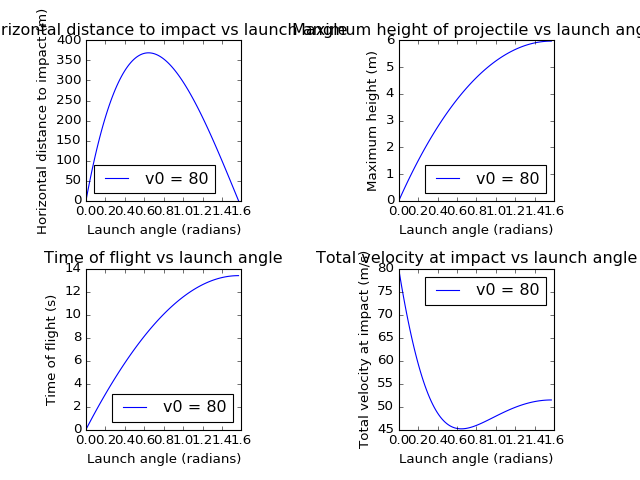

In [9]:
if plotfig:
    nfig = 0
    for v in v0:
        D_vals = []
        H_vals = []
        t_vals = []
        v_vals = []
        for a in theta:
            D_vals.append(D(a, v))
            H_vals.append(H(a, v))
            t_vals.append(t_total(a, v))
            v_vals.append(v_impact(a, v))
        
        nfig += 1
        fig = plt.figure(nfig)
        
        plt.subplot(2,2,1)
        plt.plot(theta, D_vals, label='v0 = {:g}'.format(v))
        plt.title('Horizontal distance to impact vs launch angle')
        plt.xlabel('Launch angle (radians)')
        plt.ylabel('Horizontal distance to impact (m)')
        plt.legend(loc='best')
        
        plt.subplot(2,2,2)
        plt.plot(theta, H_vals, label='v0 = {:g}'.format(v))
        plt.title('Maximum height of projectile vs launch angle')
        plt.xlabel('Launch angle (radians)')
        plt.ylabel('Maximum height (m)')
        plt.legend(loc='best')
        
        plt.subplot(2,2,3)
        plt.plot(theta, t_vals, label='v0 = {:g}'.format(v,a))
        plt.title('Time of flight vs launch angle')
        plt.xlabel('Launch angle (radians)')
        plt.ylabel('Time of flight (s)')
        plt.legend(loc='best')
        
        plt.subplot(2,2,4)
        plt.title('Total velocity at impact vs launch angle')
        plt.plot(theta, v_vals, label='v0 = {:g}'.format(v))
        plt.xlabel('Launch angle (radians)')
        plt.ylabel('Total velocity at impact (m/s)')
        plt.legend(loc='best')
        
        fig.tight_layout()
    plt.show()